In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dataset

In [8]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.loc[:, ['Age', 'EstimatedSalary']].values
y = dataset.iloc[:, -1].values

In [9]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [10]:
# Feature Scaling => not required in decision tree but still doing just out of habit
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training

In [11]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0) # considering split criteria as entropy and no performing any pruning,
# if you want to perform pruning you will need to set the parameter max_leaf_nodes = 10 / 20 / 40 / ... whatever you want
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# Inference

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[62  6]
 [ 3 29]]


# Visualizing Decision Tree

### Method 1

In [20]:
from sklearn.tree import export_text
print(export_text(classifier, feature_names=['Age', 'EstimatedSalary']))

|--- Age <= 0.63
|   |--- EstimatedSalary <= 0.61
|   |   |--- Age <= -0.16
|   |   |   |--- class: 0
|   |   |--- Age >  -0.16
|   |   |   |--- EstimatedSalary <= -0.06
|   |   |   |   |--- class: 0
|   |   |   |--- EstimatedSalary >  -0.06
|   |   |   |   |--- EstimatedSalary <= 0.40
|   |   |   |   |   |--- EstimatedSalary <= 0.03
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- EstimatedSalary >  0.03
|   |   |   |   |   |   |--- EstimatedSalary <= 0.26
|   |   |   |   |   |   |   |--- EstimatedSalary <= 0.08
|   |   |   |   |   |   |   |   |--- Age <= 0.14
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Age >  0.14
|   |   |   |   |   |   |   |   |   |--- EstimatedSalary <= 0.06
|   |   |   |   |   |   |   |   |   |   |--- Age <= 0.24
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- Age >  0.24
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   

### Method 2

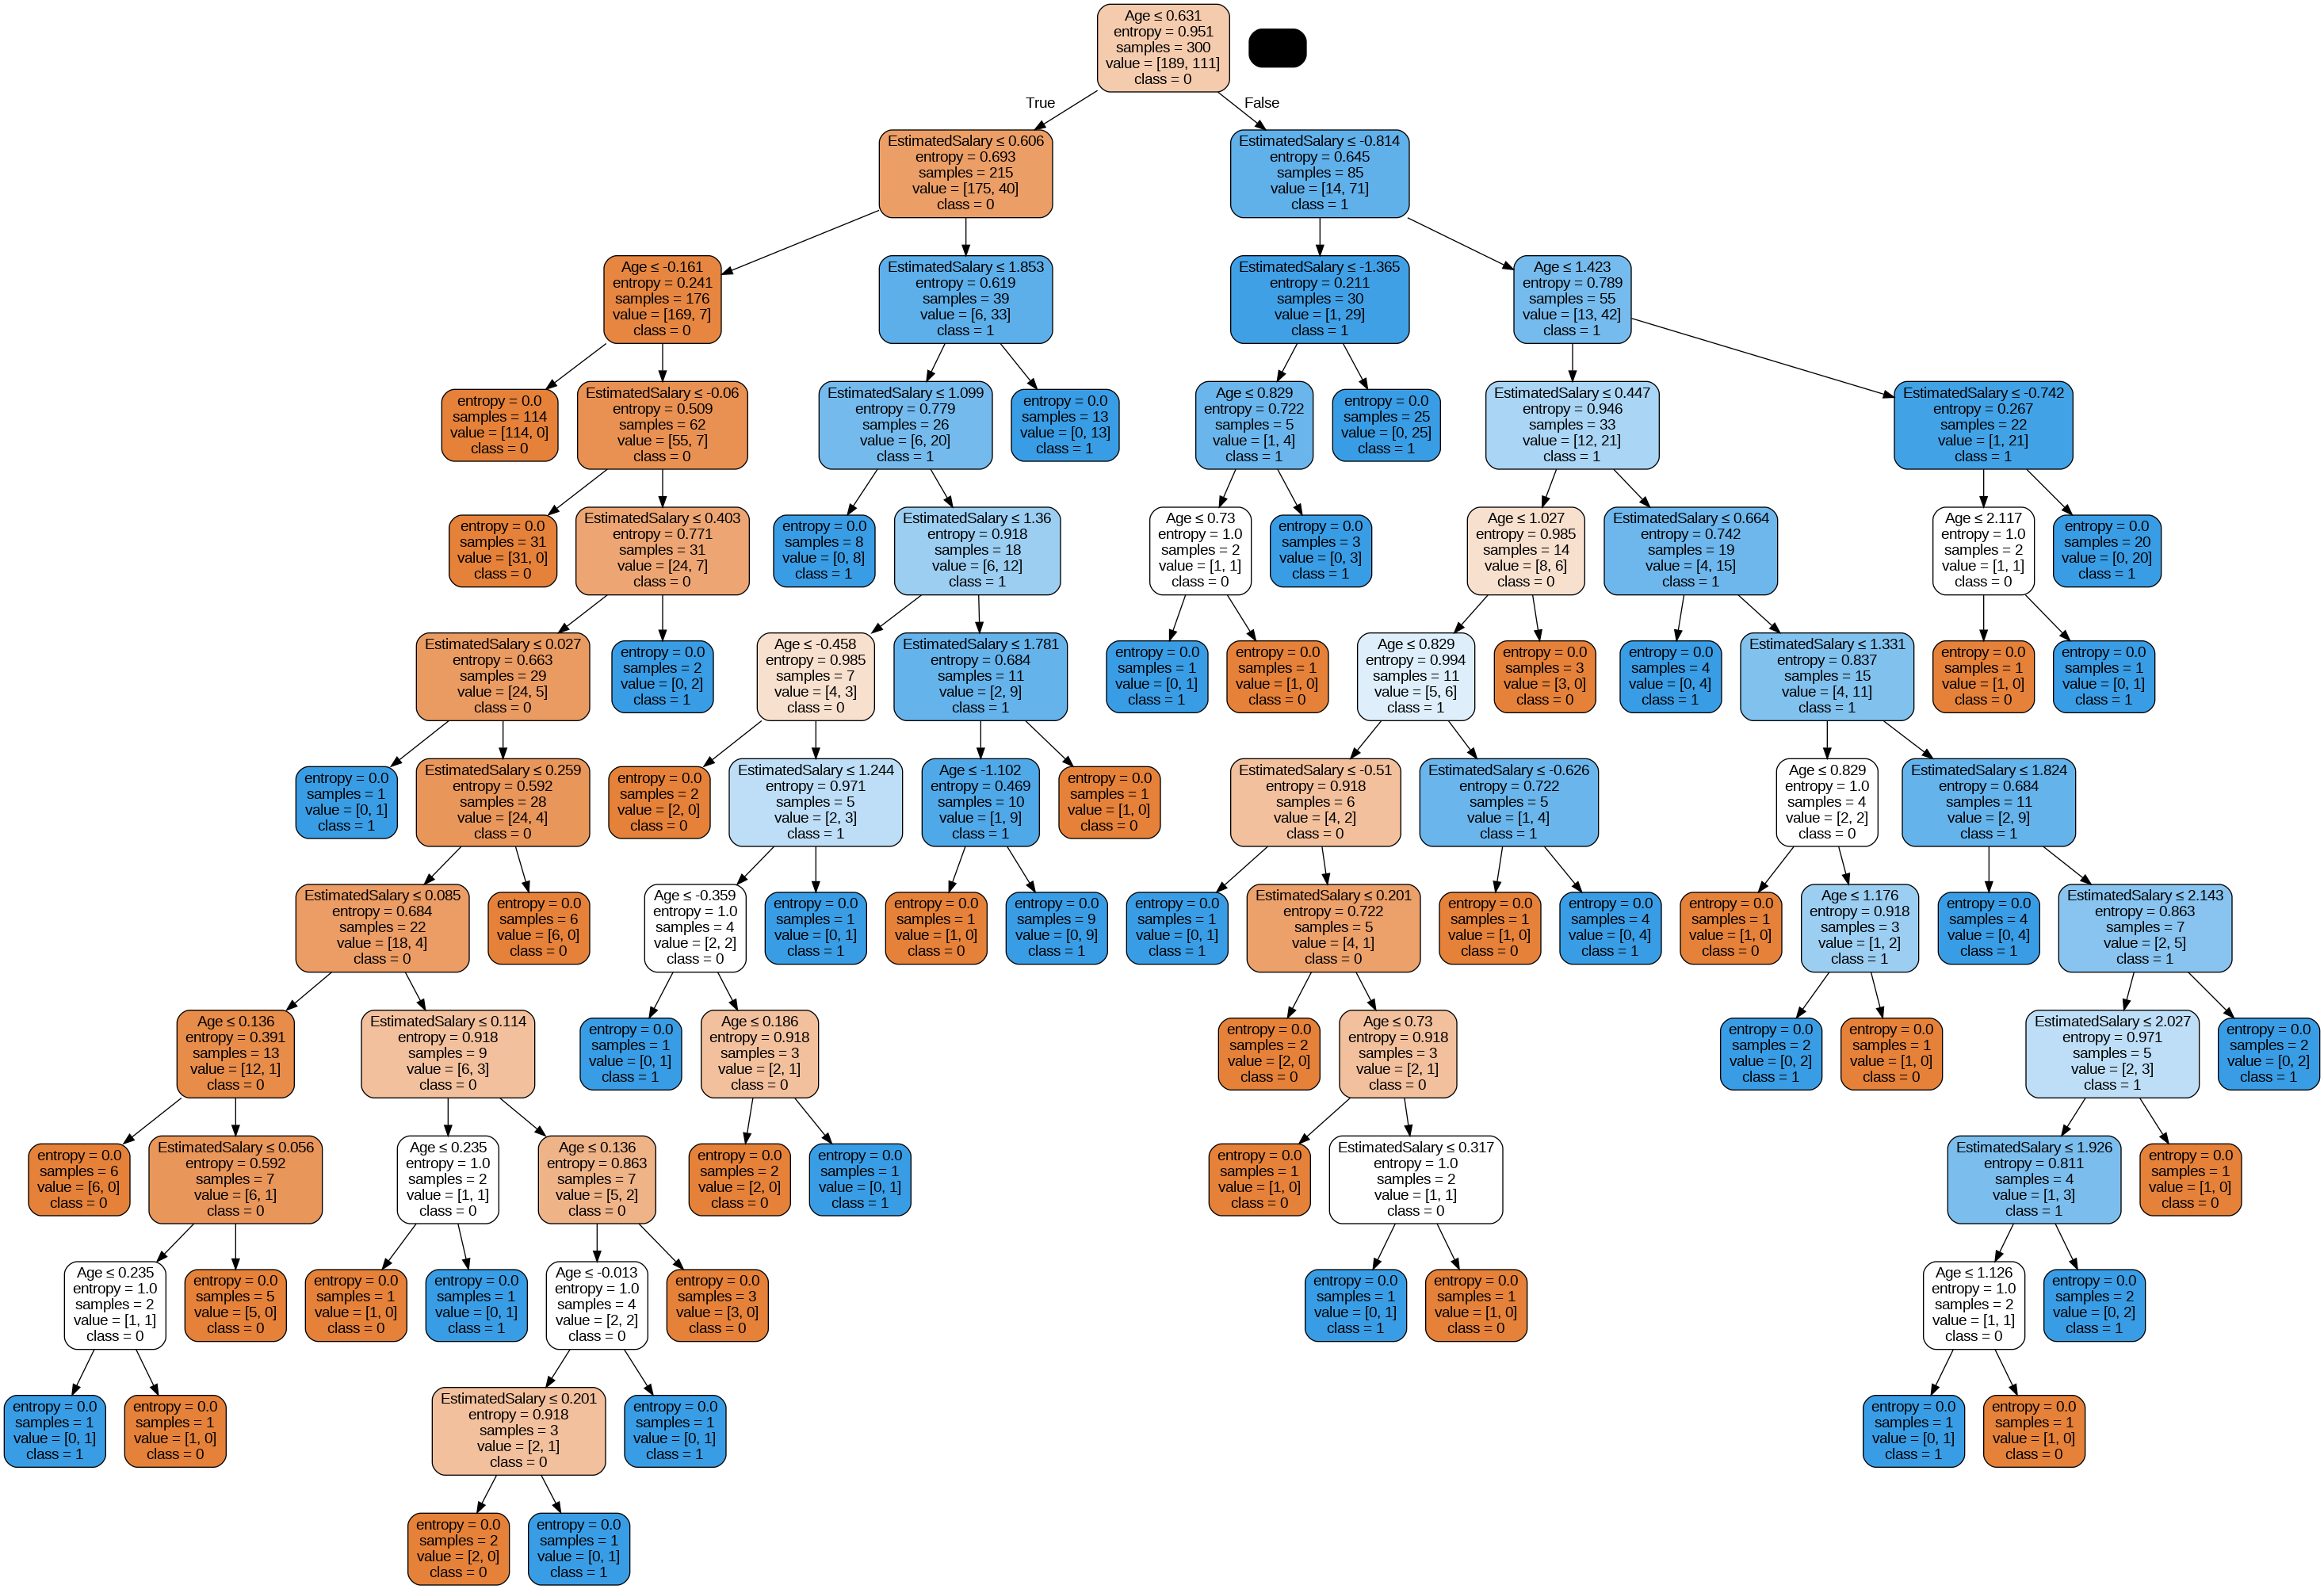

In [24]:
from IPython.display import Image
from six import StringIO
import pydotplus
from sklearn.tree import export_graphviz
dot_data = StringIO()

export_graphviz(classifier,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=['Age', 'EstimatedSalary'],
                class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Visualising the Training set results

<ipython-input-14-bcf888dc2dfc>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


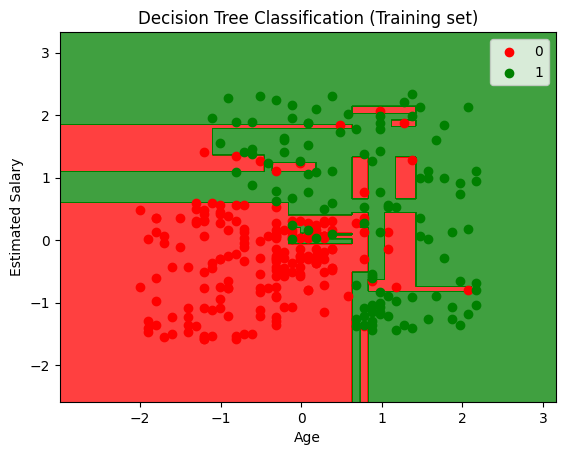

In [14]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results

<ipython-input-15-d85a9cfbe99f>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


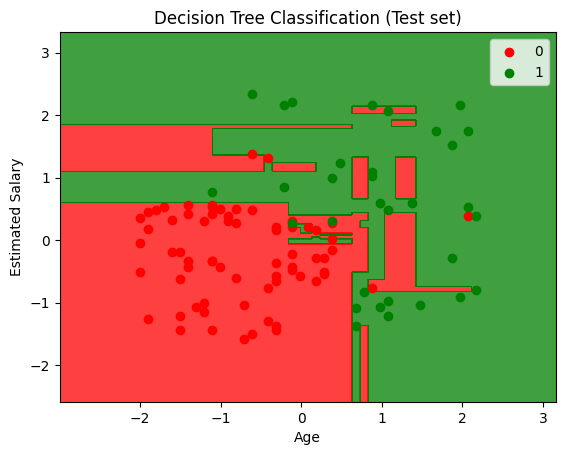

In [15]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()